# Google-stock prediction

In [1]:
#pip install tensorflow
#pip install keras

import tensorflow as tf
print(tf.__version__)

2.12.0


## 1- Download file

In [2]:
# url = 'https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction/data'


import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nilWvZA8Xx9Y2lEkP7ak4Cl4GAW9Z2WqX0YkCTXXaPk_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'capstoneadvanceddatascience-donotdelete-pr-diz0ooedaxr2ur'
object_key = 'GOOG.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head(10)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


In [3]:
import numpy as np
import pandas as pd
import zipfile
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df=data

## 2- Metadata

#### Basic Features:
- symbol: This identifies the specific company the stock data pertains to ("GOOG" for Google).
- date: This represents the date on which the stock market data was recorded. 
- close: This is the closing price of the stock on that particular date. It signifies the last price at which a trade occurred before the market closed.
- high: This represents the highest price the stock reached during trading on that day.
- low: This represents the lowest price the stock reached during trading on that day.
- open: This is the opening price of the stock on that day, indicating the first price at which a trade occurred.
- volume: This represents the total number of shares traded for the company's stock on that date. It reflects the overall trading activity for the stock.
#### Adjusted Features:
- adjClose: This is the closing price of the stock after accounting for stock splits and stock dividends. Stock splits and dividends can affect the raw closing price, so the adjusted closing price provides a more accurate picture of the stock's price over time.
- adjHigh: Similar to adjClose, this is the highest price the stock reached on that day, adjusted for stock splits and dividends.
- adjLow: Similar to adjClose, this is the lowest price the stock reached on that day, adjusted for stock splits and dividends.
- adjOpen: Similar to adjClose, this is the opening price of the stock on that day, adjusted for stock splits and dividends.
- adjVolume: Since stock splits can increase the number of shares outstanding, the adjusted volume reflects the actual trading activity before the split.
#### Dividend and Split Features:
- divCash: This represents the amount of cash dividend distributed per share on that date (if any). Dividends are a portion of a company's profit that is paid out to shareholders.
- splitFactor: This indicates the stock split ratio that occurred on or before that date (if any). A stock split increases the number of shares outstanding without affecting the total value of the company. For example, a 3-for-1 split means each share is divided into 3 shares, and the price is adjusted accordingly (becomes 1/3 of the pre-split price).

## 3- Data exploration

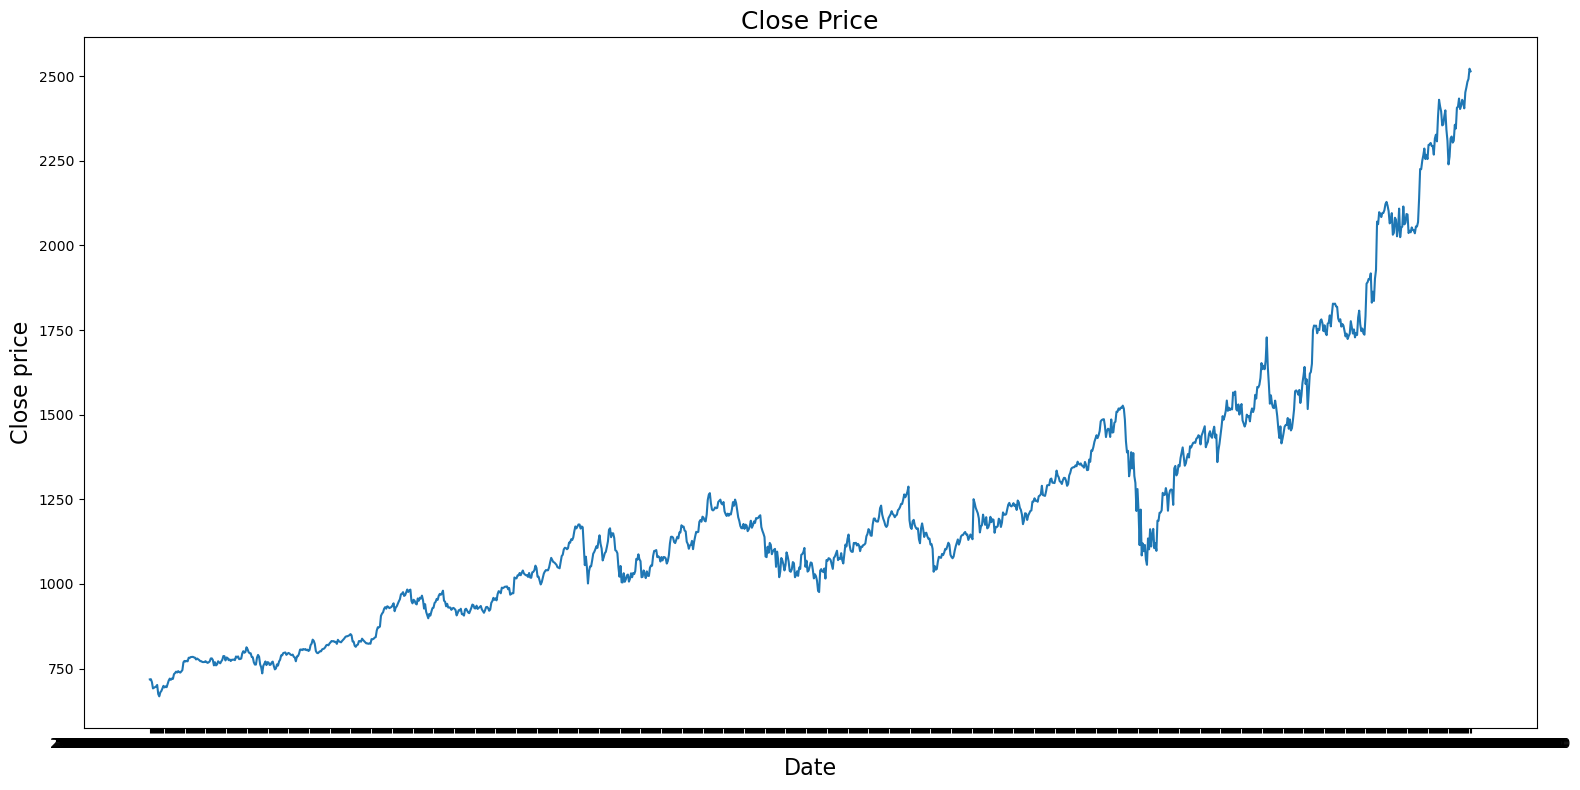

In [4]:
plt.figure(figsize=(16, 8))
plt.plot(df['date'], df['close'])
plt.ylabel('Close price', fontsize=16)
plt.xlabel('Date' , fontsize=16)
plt.title('Close Price' , fontsize= 18)
plt.tight_layout()
plt.show()

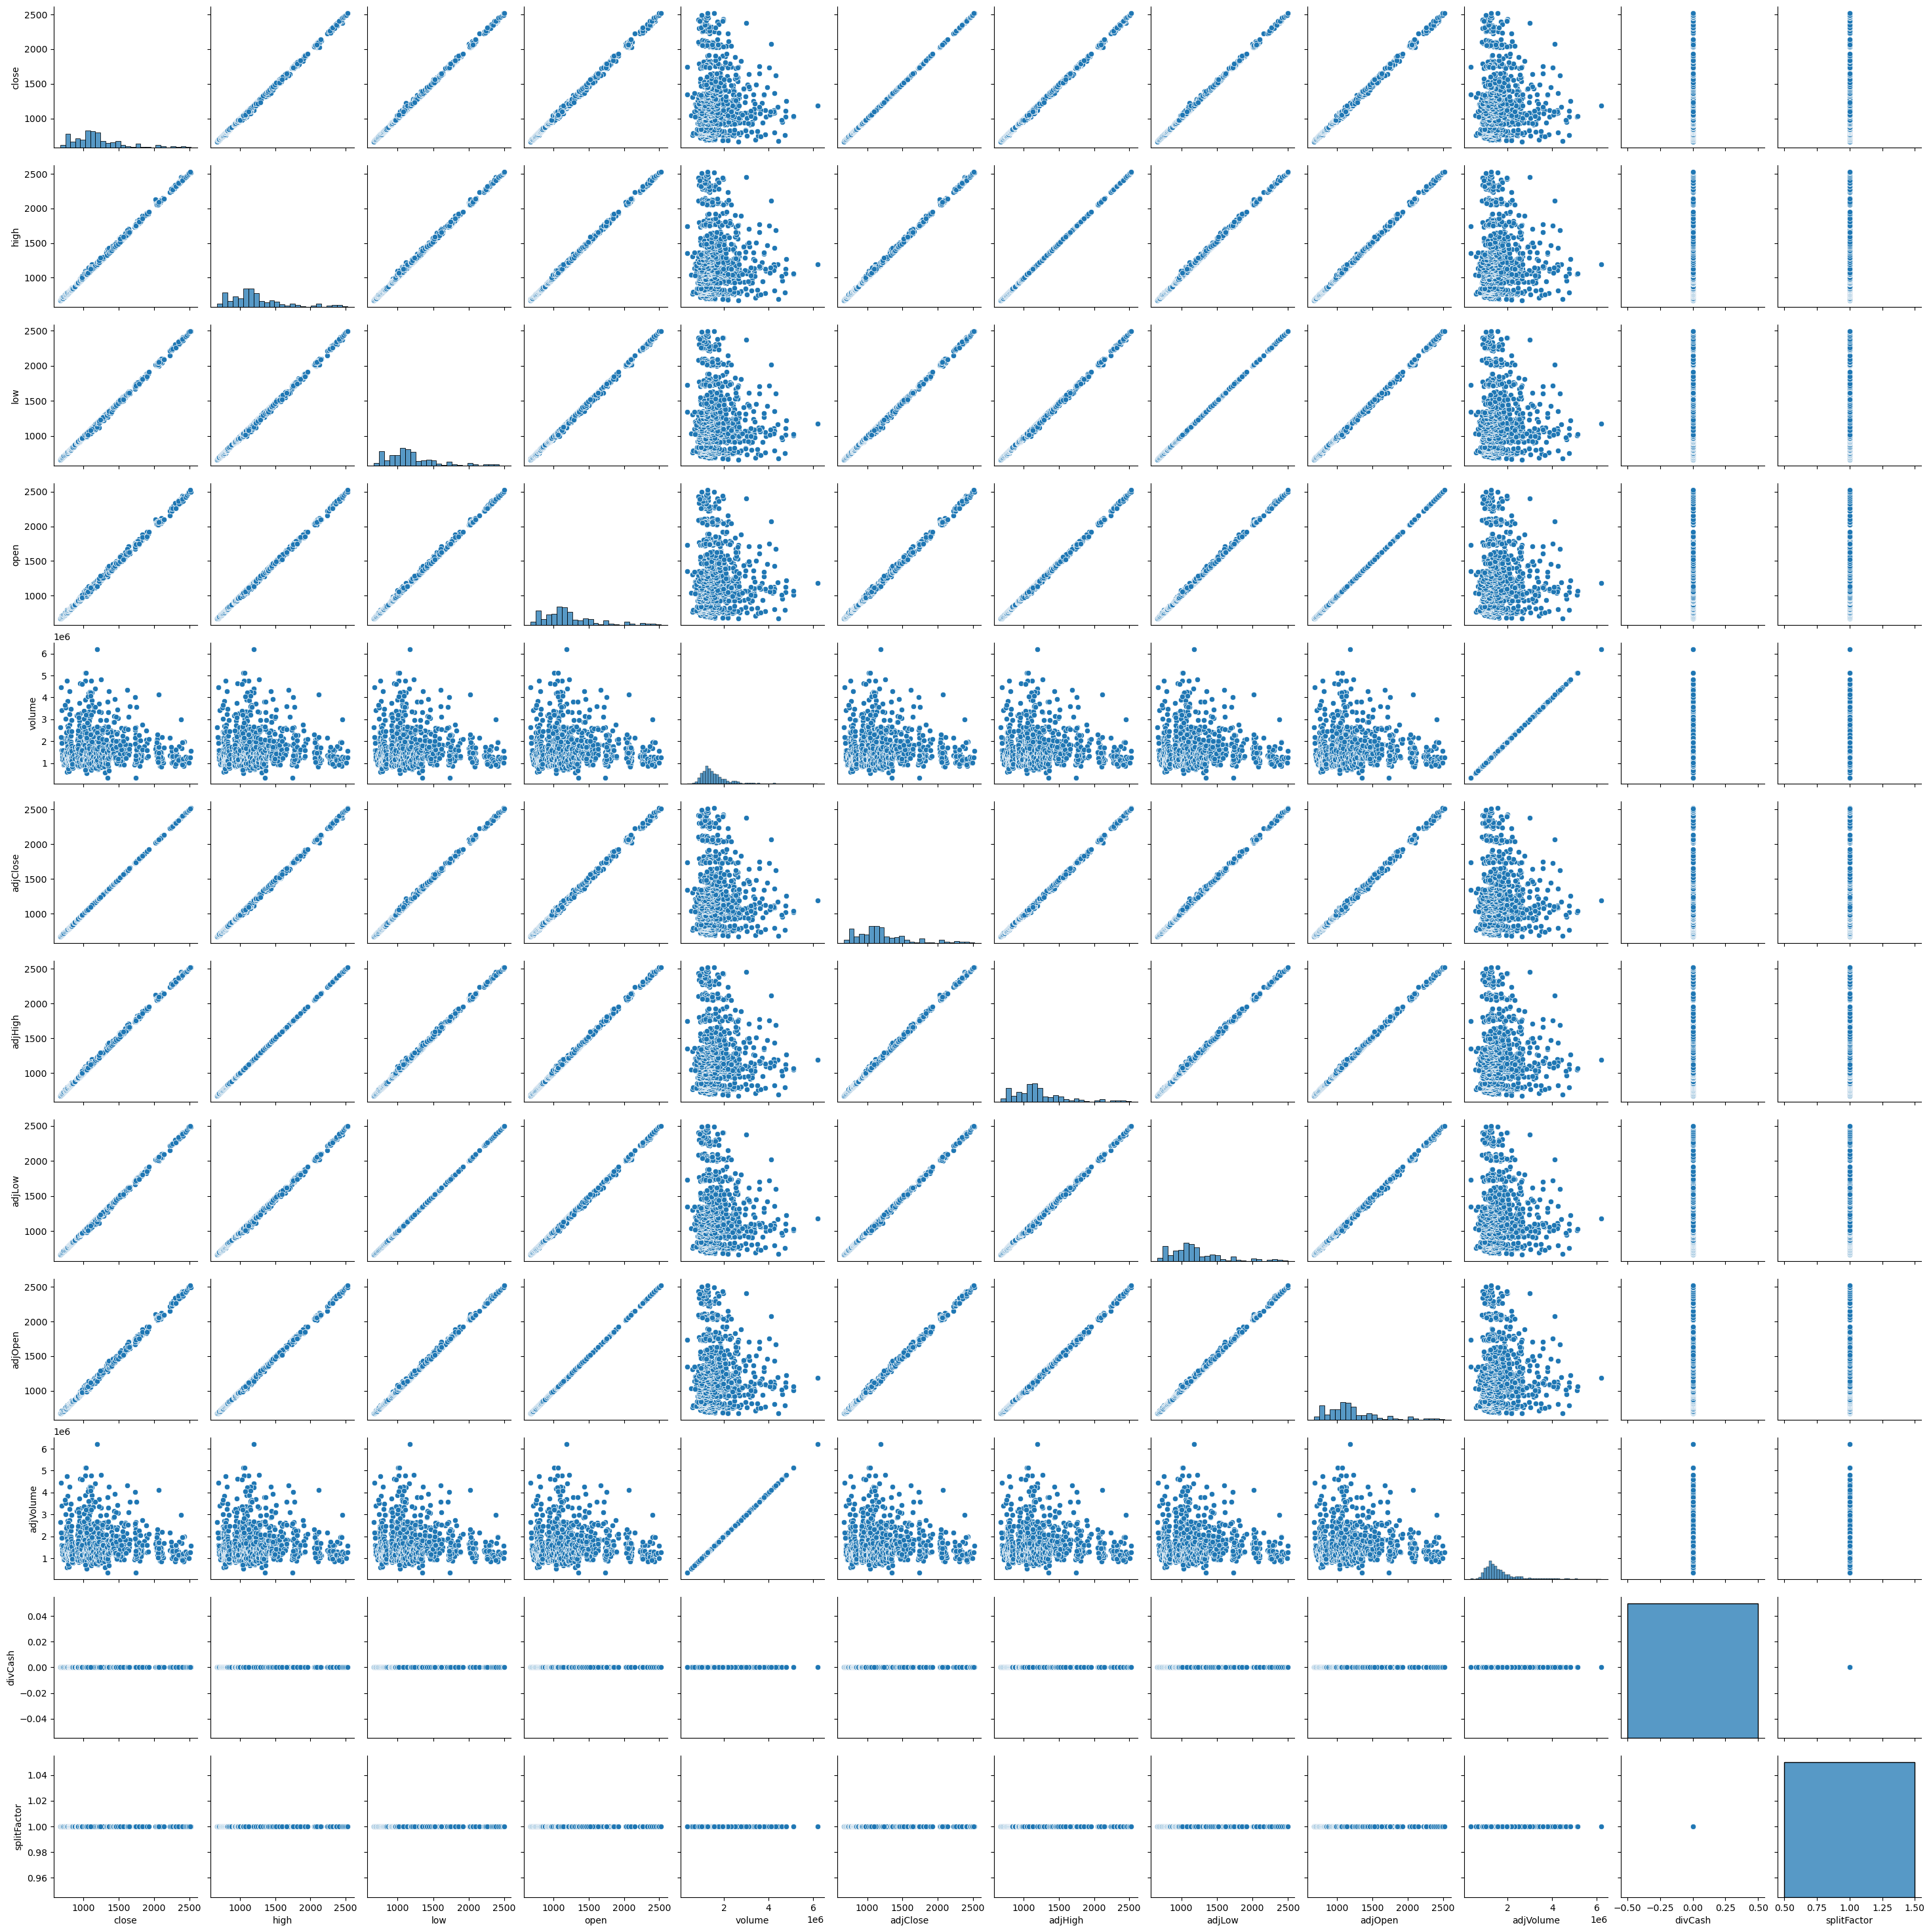

In [5]:
sns.pairplot(df)

## 4- Data Cleaning - Feature engineering

In [6]:
df.info()

df['symbol'].value_counts()

df['divCash'].value_counts()

df['splitFactor'].value_counts()

df = df[['date','close','high','low','open','volume']]

df['date']= pd.to_datetime(df['date'])

df = df.sort_values('date')

df['date'] = df['date'].dt.date

df = df.set_index('date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


/tmp/wsuser/ipykernel_673/1762844787.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df['date'])


In [7]:
df.head()

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.47,713.1200,716.48,1306065
2016-06-15,718.92,722.98,717.3100,719.00,1214517
2016-06-16,710.36,716.65,703.2600,714.91,1982471
2016-06-17,691.72,708.82,688.4515,708.65,3402357
2016-06-20,693.71,702.48,693.4100,698.77,2082538


## 5- DeepLearning algorithm ( LSTM)

In [8]:
# our objectif is to predict the close price

close_data = df['close']
close_data = pd.DataFrame(close_data)
close = close_data.values

### 5-1 Without normalization

#### 5-1-1 Train_set, Test_set

In [9]:
train_size = int(len(close)*.8)
test_size = len(close)-train_size

time_steps = 60

train = close[ :train_size, 0:1]
test = close[train_size-time_steps: , 0:1]   # we add - time_steps because e need previous data so we can forecast

In [10]:
train_size, test_size

(1006, 252)

In [11]:
train.shape, test.shape

((1006, 1), (312, 1))

In [12]:
# split function 
def split(data,size):
    X = []
    y = []
    for i in range(time_steps,size):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i,0])

    # transform X_train and y_train to an array such that we can use np.reshape    
    X = np.array(X)
    y = np.array(y)

    # output shape (batch_size, timesteps, output) for an LSTM model
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X,y

In [13]:
X_train, y_train = split(train,len(train))

#### 5-1-2 LSTM model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
  LSTM(40, return_sequences=True, input_shape=(X_train.shape[1], 1)),
  LSTM(70, return_sequences=False), 
  Dense(32),
  Dense(16), 
  Dense(8), 
  Dense(1) 
])

# Compile the model within the function (important for GridSearchCV)
model.compile(optimizer='adam', loss='mse', metrics=["mean_absolute_error"])

In [15]:
# stop the processus if there is no improvment
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]

# fit the model
model.fit(X_train, y_train, epochs= 50, batch_size= 30, callbacks= callbacks )

Epoch 1/50
32/32 [==============================] - 5s 39ms/step - loss: 1149705.2500 - mean_absolute_error: 1056.7045
Epoch 2/50
32/32 [==============================] - 1s 32ms/step - loss: 858882.7500 - mean_absolute_error: 906.1405
Epoch 3/50
32/32 [==============================] - 1s 33ms/step - loss: 309398.0938 - mean_absolute_error: 499.7379
Epoch 4/50
32/32 [==============================] - 1s 46ms/step - loss: 38439.7461 - mean_absolute_error: 158.4588
Epoch 5/50
32/32 [==============================] - 1s 44ms/step - loss: 32914.0117 - mean_absolute_error: 145.1165
Epoch 6/50
32/32 [==============================] - 1s 43ms/step - loss: 32697.2129 - mean_absolute_error: 145.2159
Epoch 7/50
32/32 [==============================] - 1s 40ms/step - loss: 32718.7461 - mean_absolute_error: 144.7338
Epoch 8/50
32/32 [==============================] - 1s 33ms/step - loss: 32684.6914 - mean_absolute_error: 144.7516
Epoch 9/50
32/32 [==============================] - 1s 36ms/step - 

#### 5-1-3 Predictions

In [16]:
X_test, y_test = split(test,len(test))
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 11ms/step


#### 5-1-4 Evaluation

In [17]:
RMSE = np.sqrt(np.mean( y_test - y_pred )**2).round(2)
RMSE

752.24

#### 5-1-5 Visualization

/tmp/wsuser/ipykernel_673/1604530923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


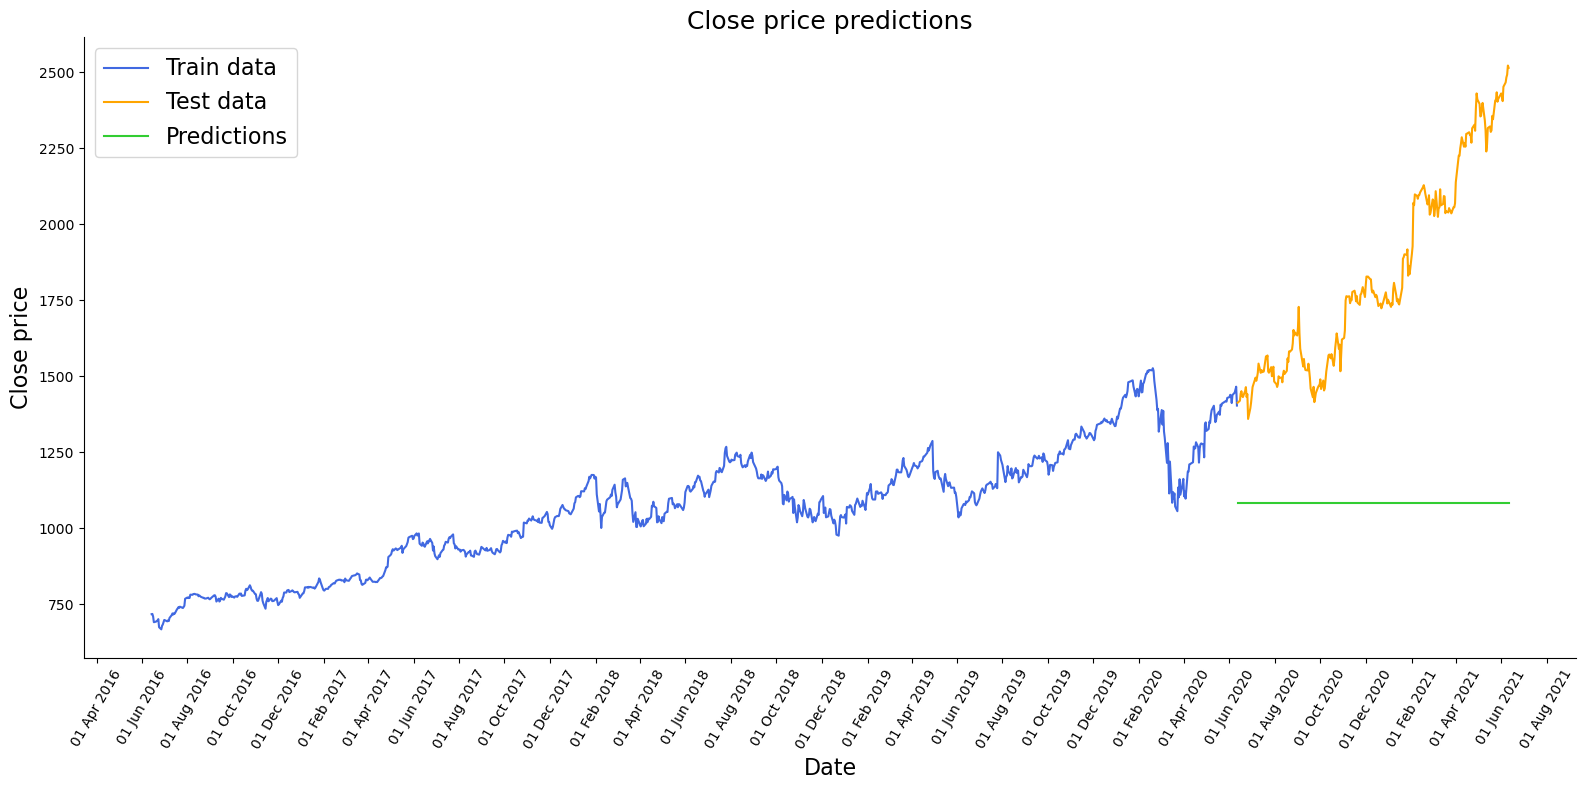

In [18]:
import matplotlib.dates as mdates

train = close_data.iloc[:train_size]
test = close_data.iloc[train_size:]
test['Pred'] = y_pred

fig, ax = plt.subplots(figsize= (16, 8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Close price predictions', fontsize= 18)
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize= 16)
plt.ylabel('Close price', fontsize= 16)
plt.plot(train['close'], c='royalblue')
plt.plot(test['close'], c='orange')
plt.plot(test["Pred"], c='limegreen')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(0, 13, 2)))  # select odd months only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Use %Y for full year
plt.legend(['Train data', 'Test data', 'Predictions'], fontsize=16)
plt.tight_layout()
plt.show()

### 5-2 With normalization

#### 5-2-1 Normalization - Train_set, Test_set

In [19]:
close_data = df['close']
close_data = pd.DataFrame(close_data)
close = close_data.values

In [20]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close = scaler.fit_transform(close.reshape(-1,1))
train_size = int(len(close)*.8)
test_size = len(close)-train_size

In [21]:
time_steps = 60

train = close[ :train_size, 0:1]
test = close[train_size-time_steps: , 0:1]   # we add - time_steps because e need previous data so we can forecast

In [22]:
X_train, y_train = split(train,len(train)) 

#### 5-2-2 LSTM model

In [23]:
model = Sequential([
  LSTM(40, return_sequences=True, input_shape=(X_train.shape[1], 1)),
  LSTM(70, return_sequences=False), 
  Dense(32),
  Dense(16), 
  Dense(8), 
  Dense(1) 
])

# Compile the model within the function (important for GridSearchCV)
model.compile(optimizer='adam', loss='mse', metrics=["mean_absolute_error"])

In [24]:
# stop the processus if there is no improvment

from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]

# fit the model
model.fit(X_train, y_train, epochs= 50, batch_size= 30, callbacks= callbacks )

Epoch 1/50
32/32 [==============================] - 4s 32ms/step - loss: 0.0067 - mean_absolute_error: 0.0593
Epoch 2/50
32/32 [==============================] - 1s 31ms/step - loss: 6.0678e-04 - mean_absolute_error: 0.0181
Epoch 3/50
32/32 [==============================] - 1s 34ms/step - loss: 4.2497e-04 - mean_absolute_error: 0.0148
Epoch 4/50
32/32 [==============================] - 1s 34ms/step - loss: 4.0807e-04 - mean_absolute_error: 0.0142
Epoch 5/50
32/32 [==============================] - 1s 32ms/step - loss: 4.1712e-04 - mean_absolute_error: 0.0147
Epoch 6/50
32/32 [==============================] - 1s 31ms/step - loss: 4.2885e-04 - mean_absolute_error: 0.0154
Epoch 7/50
32/32 [==============================] - 1s 30ms/step - loss: 3.6097e-04 - mean_absolute_error: 0.0136
Epoch 8/50
32/32 [==============================] - 1s 36ms/step - loss: 3.3759e-04 - mean_absolute_error: 0.0131
Epoch 9/50
32/32 [==============================] - 1s 32ms/step - loss: 3.3684e-04 - mean_a

#### 5-2-3 Predictions (LSTM)

In [25]:
X_test, y_test = split(test,len(test))
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

8/8 [==============================] - 1s 15ms/step


#### 5-2-4 Evaluation

In [26]:
RMSE = np.sqrt(np.mean( y_test - y_pred )**2).round(2)
RMSE

40.52

#### 5-2-5 Visualization

In [27]:
train = close_data.iloc[:train_size]
test = close_data.iloc[train_size:]
test['Pred'] = y_pred

/tmp/wsuser/ipykernel_673/1953734234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


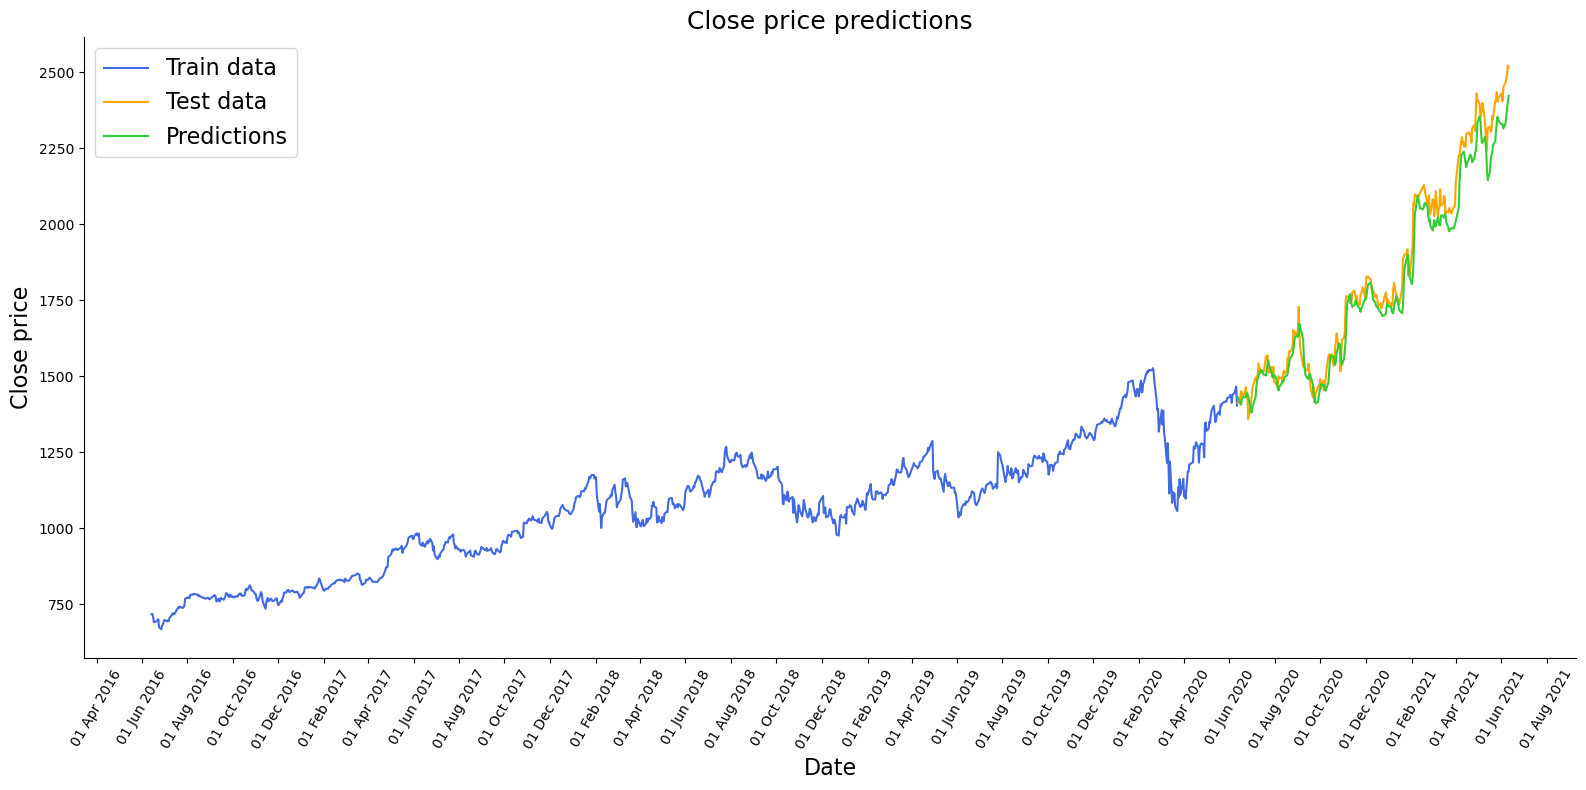

In [28]:
fig, ax = plt.subplots(figsize= (16, 8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Close price predictions', fontsize= 18)
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize= 16)
plt.ylabel('Close price', fontsize= 16)
plt.plot(train['close'], c='royalblue')
plt.plot(test['close'], c='orange')
plt.plot(test["Pred"], c='limegreen')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(0, 13, 2)))  # select odd months only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Use %Y for full year
plt.legend(['Train data', 'Test data', 'Predictions'], fontsize=16)
plt.tight_layout()
plt.show()

## 6- Machine Learning algorithm (LinearRegressor)

### 6-1- Train_set, test_set

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df2 = data

In [30]:
df2['date']= pd.to_datetime(df2['date'])
df2['date'] = df2['date'].dt.date
df2 = df2.set_index('date')

In [31]:
y = df2['close']
X = df2[['high','low','open','volume']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

### 6-2- Model fitting

In [34]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

### 6-3- Predictions

In [35]:
y_pred = lin_reg.predict(X_test)
y_pred = lin_reg.predict(X_test)

### 6-4- Evaluation

In [36]:
RMSE = np.sqrt(np.mean( y_test - y_pred )**2).round(2)
RMSE

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


close    0.25
dtype: float64

### 6-5- Visualization

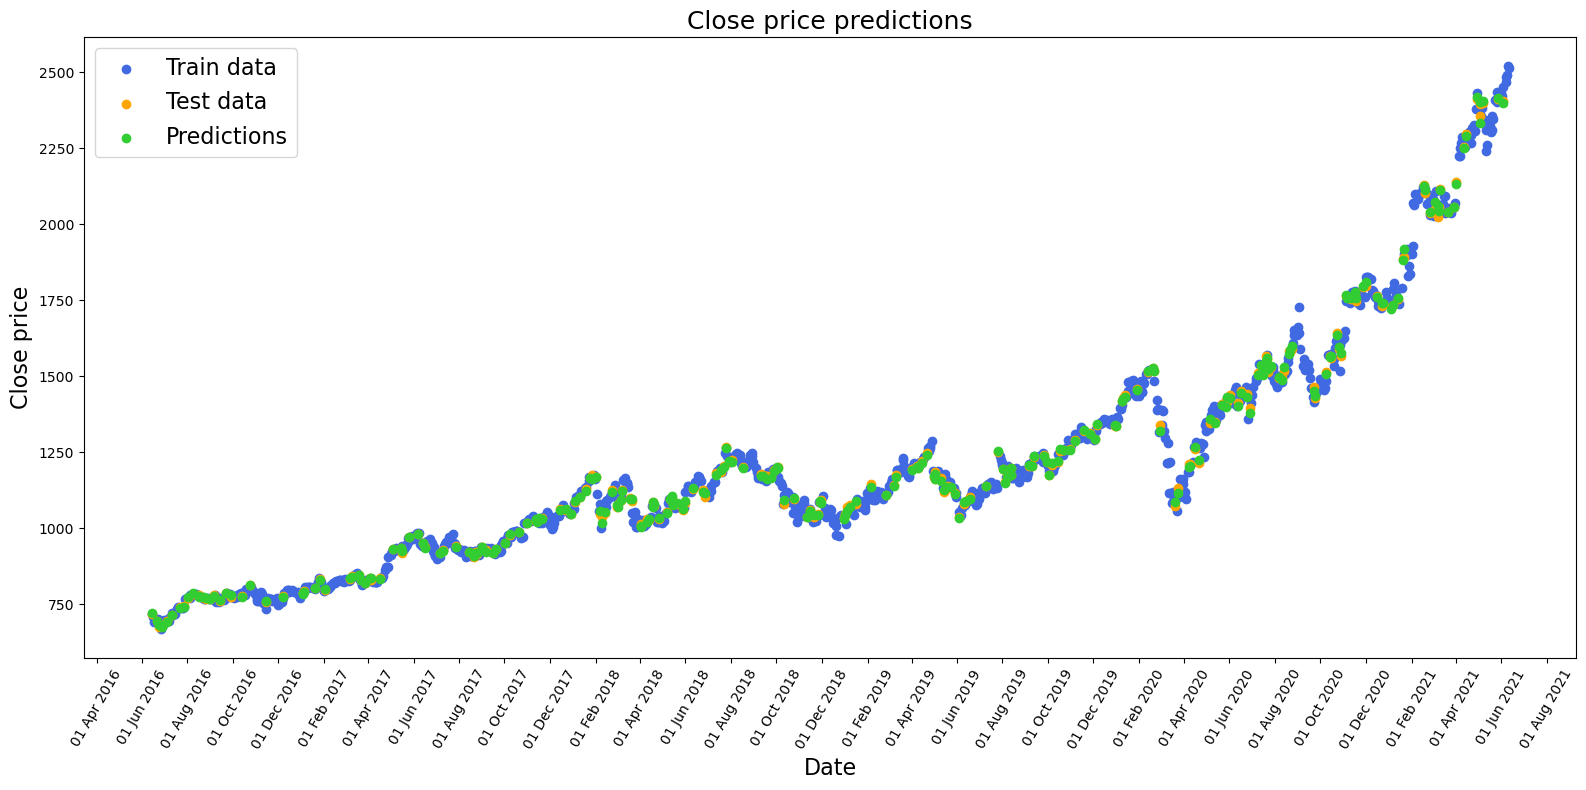

In [37]:
import matplotlib.dates as mdates

y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.set_index(y_test.index)

fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Close price predictions', fontsize= 18)
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize= 16)
plt.ylabel('Close price', fontsize= 16)
plt.scatter(y_train.index, y_train, c='royalblue')
plt.scatter(y_test.index, y_test, c='orange')
plt.scatter(y_pred.index, y_pred, c='limegreen')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(0, 13, 2)))  # select odd months only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Use %Y for full year
plt.legend(['Train data', 'Test data', 'Predictions'], fontsize=16)
plt.tight_layout()
plt.show()

### 6-6- Linear Regression using only "open" and '"volume"

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


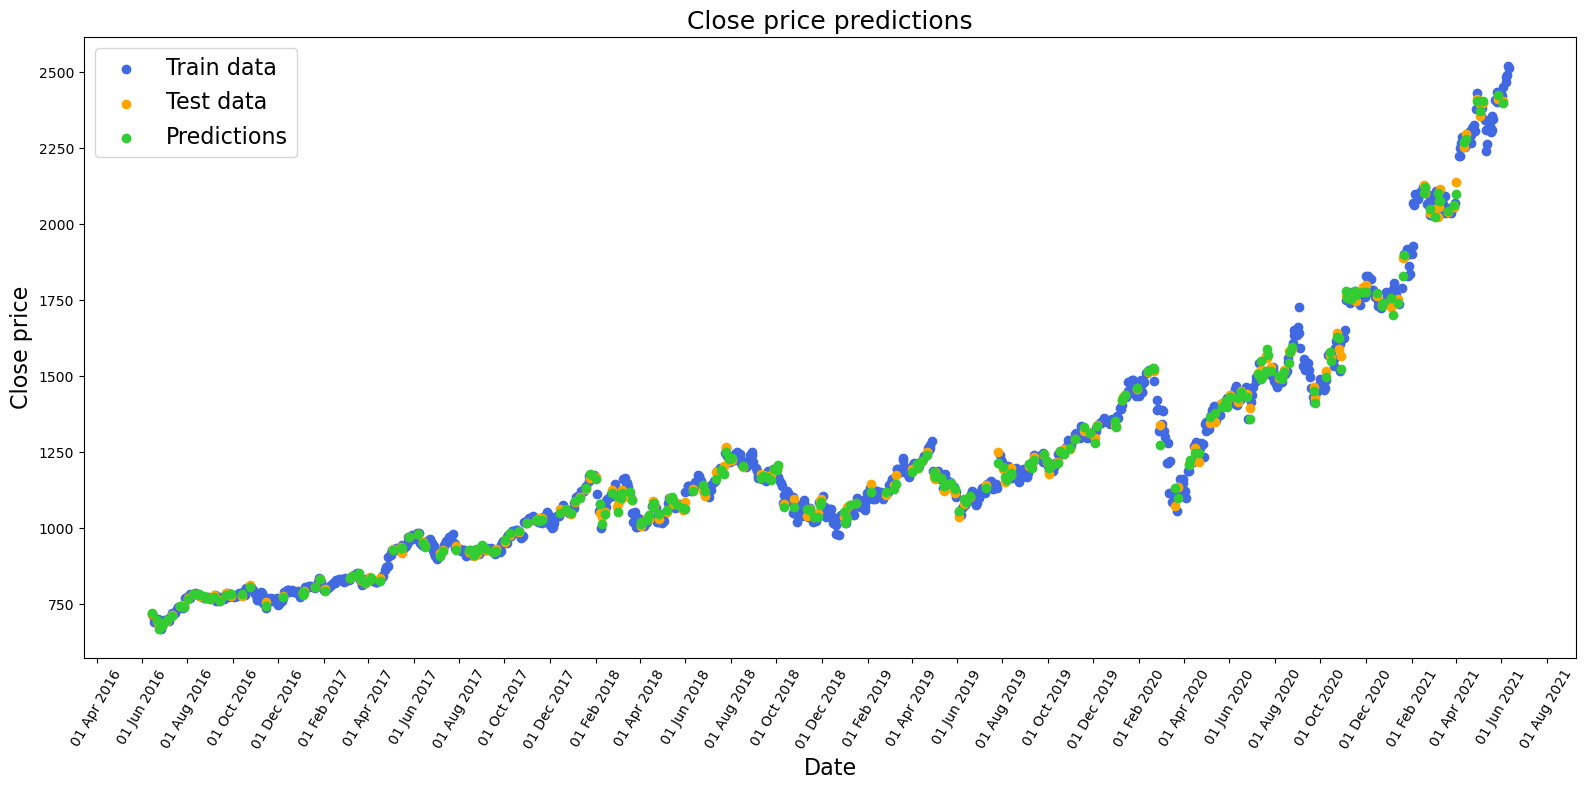

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df3 = data
df3['date']= pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.date
df3 = df3.set_index('date')

y = df3['close']
X = df3[['open','volume']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = pd.DataFrame(y_train)

y_test = pd.DataFrame(y_test)
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression
LinearRegression()
y_pred = lin_reg.predict(X_test)
RMSE = np.sqrt(np.mean( y_test - y_pred )**2).round(2)
RMSE

import matplotlib.dates as mdates

y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.set_index(y_test.index)
#y_pred=y_pred.sort_values('date')

fig, ax = plt.subplots(figsize=(16, 8))

# Set major locator to show ticks every month

plt.title('Close price predictions', fontsize= 18)
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize= 16)
plt.ylabel('Close price', fontsize= 16)
plt.scatter(y_train.index, y_train, c='royalblue')
plt.scatter(y_test.index, y_test, c='orange')
plt.scatter(y_pred.index, y_pred, c='limegreen')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(0, 13, 2)))  # select odd months only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Use %Y for full year
plt.legend(['Train data', 'Test data', 'Predictions'], fontsize=16)
plt.tight_layout()
plt.show()
